In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 데이터 불러오기 
train = pd.read_csv("./따릉이/train.csv")
test = pd.read_csv("./따릉이/test.csv")
submission = pd.read_csv

<AxesSubplot: >

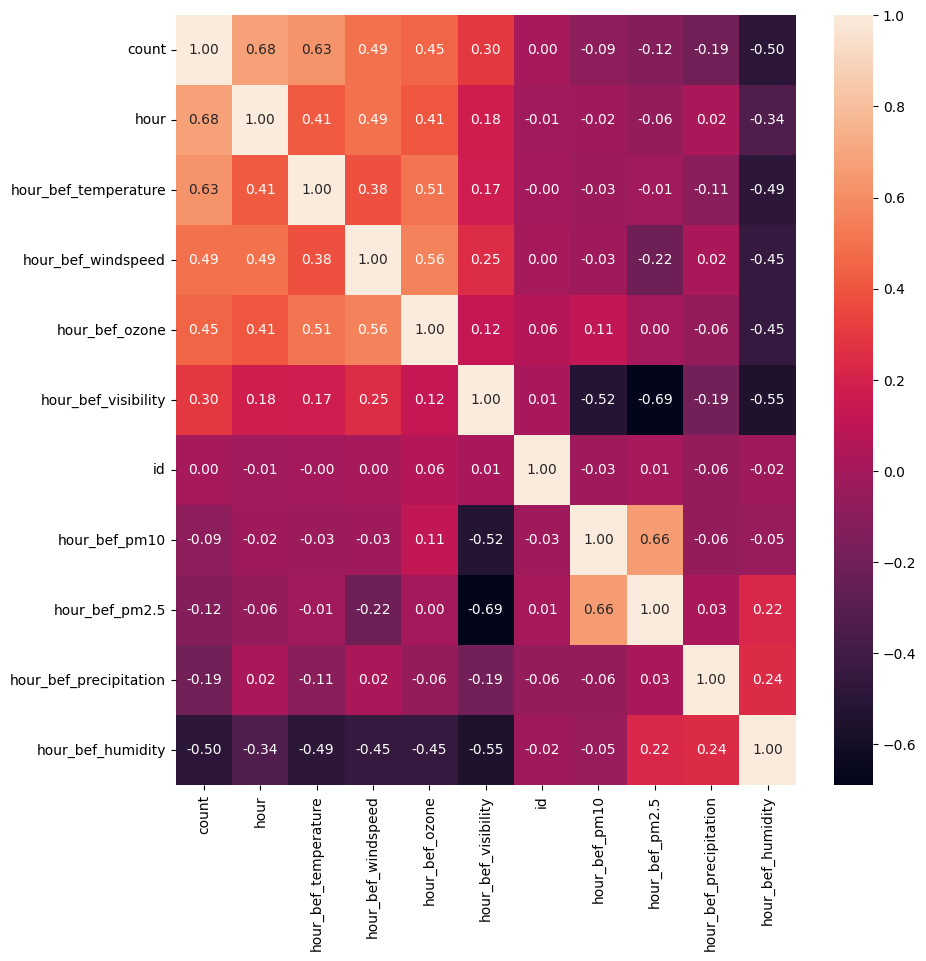

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
corrmat = train.corr(method='spearman')
indexes = corrmat.nlargest(n=11, columns='count').index
corrmat = train[indexes].corr(method='spearman')
sns.heatmap(data=corrmat, annot=True, cbar=True, fmt='.2f', ax=ax)

<AxesSubplot: xlabel='hour'>

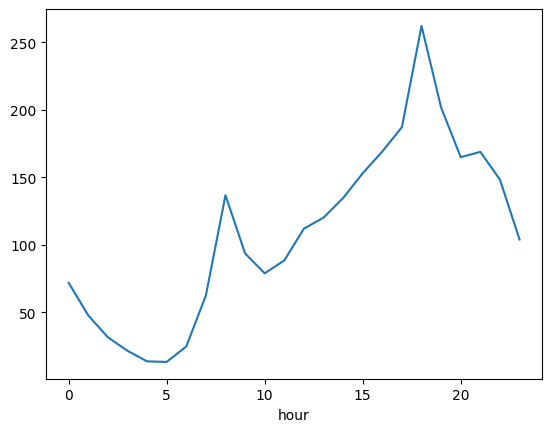

In [11]:
# 오전 8시와 오후 6시 출퇴근 시간에 몰린다 
train.groupby('hour').mean()['count'].plot()

In [12]:
train['hour_bef_temperature'].fillna({934 :14.788136, 1035:20.926667}, inplace=True)

In [13]:
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [14]:
train['hour_bef_windspeed'].fillna({18:3.281356,244:1.836667,260:1.620000,376:1.965517,780:3.278333,
                                    934:1.965517, 1035:3.838333, 1138:2.766667,1229:1.633333},inplace=True)

In [15]:
test['hour_bef_temperature'].fillna({653:26.110345},inplace=True)

In [16]:
test.groupby('hour').mean()['hour_bef_temperature'] #653

hour
0     21.386667
1     20.986667
2     20.600000
3     20.203333
4     19.853333
5     19.634483
6     19.243333
7     19.190000
8     19.846667
9     21.266667
10    22.683333
11    24.110000
12    25.430000
13    26.630000
14    27.473333
15    28.040000
16    28.255172
17    27.848276
18    27.010345
19    26.110345
20    24.803333
21    23.696552
22    22.523333
23    21.926667
Name: hour_bef_temperature, dtype: float64

In [17]:
test['hour_bef_windspeed'].fillna({653:3.541379}, inplace=True)

In [18]:
train.groupby('hour_bef_precipitation').mean()['hour_bef_humidity']

hour_bef_precipitation
0.0    51.214741
1.0    83.413043
Name: hour_bef_humidity, dtype: float64

In [19]:
train[train['hour_bef_precipitation'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


In [20]:
train['hour_bef_precipitation'].fillna({934:1, 1035:0}, inplace=True)
test['hour_bef_precipitation'].fillna({934:1, 653:0}, inplace=True)

In [21]:
train['hour_bef_humidity'].fillna({934:83.413043, 1035:51.214741}, inplace=True)

In [22]:
test['hour_bef_humidity'].fillna({653:51.214741}, inplace=True)

In [23]:
train.drop(['hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'], axis=1,inplace=True)
test.drop(['hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'], axis=1,inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['id', 'count'], axis =1)
target = train["count"]
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.3, random_state =0)

In [28]:
from sklearn.ensemble import RandomForestRegressor

model100 = RandomForestRegressor(n_estimators=200, random_state=0) # Decision Tree model
model100.fit(X_train, y_train)
ypred1 = model100.predict(X_test)

In [29]:
ids = test['id']
predictions = model100.predict(test.drop('id', axis=1))

output = pd.DataFrame({'id': ids, 'count' : predictions})
output.to_csv('submission.csv', index=False)

In [36]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [38]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'min_impurity_split'

In [40]:
rfr_pred = rfr.predict(X_test)
mse_eval('RandomForest Ensemble', y_test, rfr_pred)

NameError: name 'mse_eval' is not defined

In [33]:
from xgboost import XGBRegressor, XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [34]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

NameError: name 'XGBRegressor' is not defined

In [35]:
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', y_test, xgb_pred)

NameError: name 'xgb' is not defined